# Task No 4 - EDA of Terrorist Data

Main aim of this task is to find the hot zone of terrorist attact in the world.

**Author : Shahzad Abbas**

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (12, 6)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
pd.set_option("display.max_columns", 135)
pd.set_option("display.max_rows", 135)

## Loading Data

In [5]:
path = r"D:\CHAND's DATA\Study data\Additional Work\Data Science\Spark Foundation Internship\Task 4\terrorist_data.csv"
df = pd.read_csv(path, encoding="latin1")
df.head()

C:\Users\Ch Chand\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
df.shape

(181691, 135)

## Analysis

#### Removing unnecassary columns

In [7]:
imp_col = ["iyear", "imonth", "iday", "extended", "country_txt", "region_txt", "provstate", "city", "latitude", "longitude", "success", "suicide", "attacktype1_txt", "targtype1_txt", "weaptype1_txt"]
df = df[imp_col]
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,weaptype1_txt
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Unknown
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary


In [8]:
df[["country_txt", "region_txt", "provstate", "city", "attacktype1_txt", "targtype1_txt", "weaptype1_txt"]].describe(include="all")

,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,weaptype1_txt
count,181691,181691,181270,181257,181691,181691,181691
unique,205,12,2855,36674,9,22,12
top,Iraq,Middle East & North Africa,Baghdad,Unknown,Bombing/Explosion,Private Citizens & Property,Explosives
freq,24636,50474,7645,9775,88255,43511,92426


### Most suffered zones by Global Terrorism are...
- Country     : Iraq
- Region      : Middle East & North Africa
- State       : Baghdad
- Attack Type : Bombing/Explosion
- Weapon Type : Explsives
- Target : Private Citizens & Property


## Exploratory Data Analysis

In [9]:
def per_on_bar(plot,feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

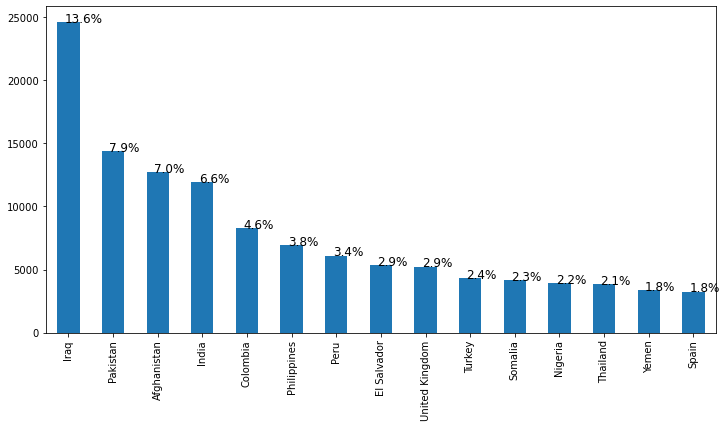

In [10]:
ax = df.country_txt.value_counts().iloc[0:15].plot(kind="bar")
per_on_bar(ax, df.country_txt)

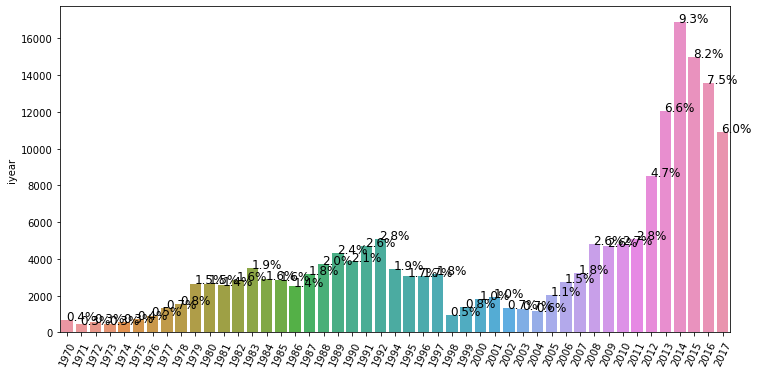

<Figure size 1440x720 with 0 Axes>

In [11]:
x = df.iyear.unique()
y = df.iyear.value_counts().sort_index()
plt.xticks(rotation=65)
ax = sns.barplot(x, y)
per_on_bar(ax, df.iyear)
plt.figure(figsize=(20,10))
plt.show()

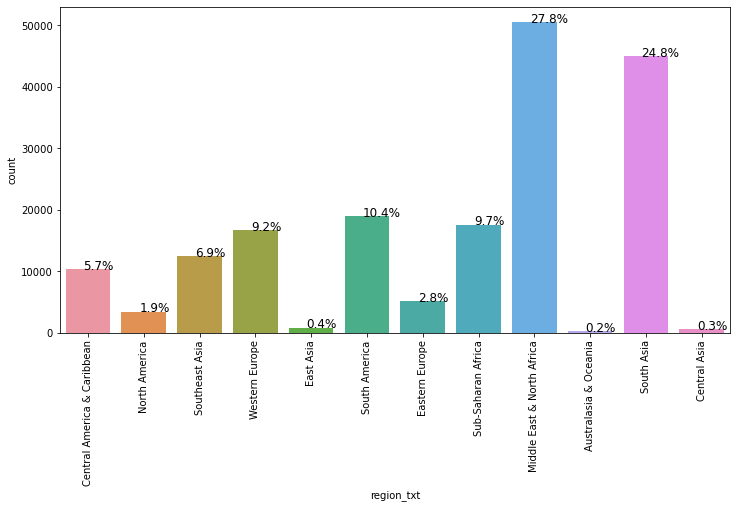

In [12]:
ax = sns.countplot(df.region_txt)
plt.xticks(rotation=90)
per_on_bar(ax, df.region_txt)

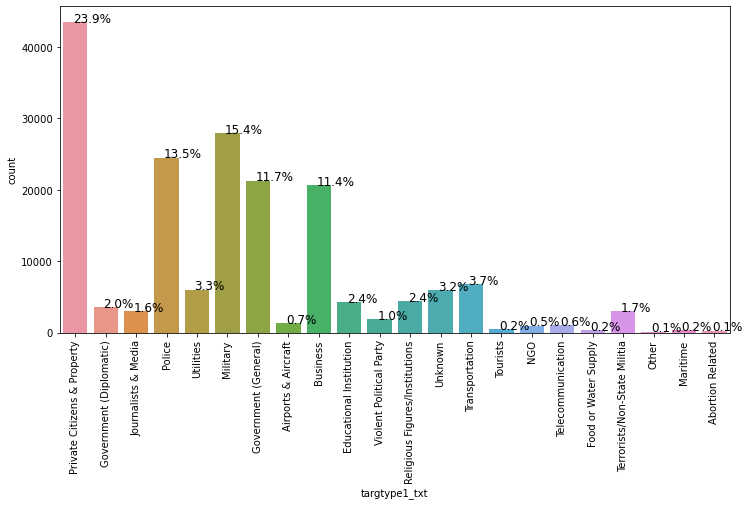

In [13]:
ax = sns.countplot(df.targtype1_txt)
plt.xticks(rotation=90)
per_on_bar(ax, df.targtype1_txt)

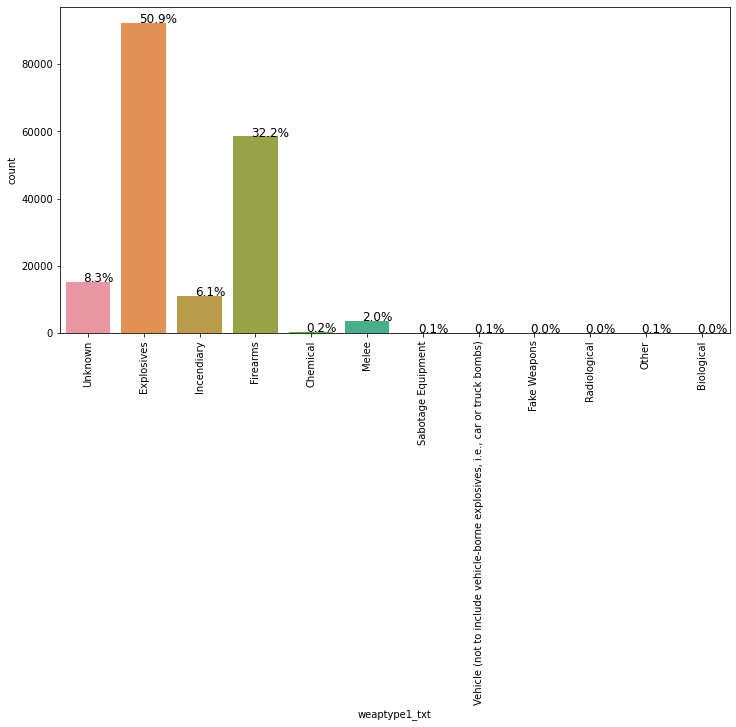

In [15]:
ax = sns.countplot(df.weaptype1_txt)
plt.xticks(rotation=90)
per_on_bar(ax, df.weaptype1_txt)

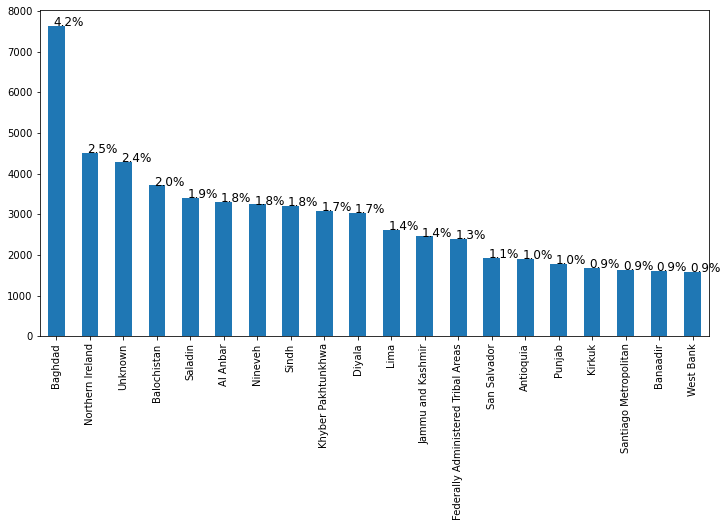

In [18]:
ax = df.provstate.value_counts().head(20).plot(kind="bar")
per_on_bar(ax, df.provstate)

In [19]:
data = df.groupby("country_txt", as_index=False).count()
px.choropleth(
    data,
    locations="country_txt",
    locationmode="country names",
    color="iyear",
    hover_name="country_txt"
)